# PyTorch深度神经网络

In [1]:
from torchvision import models

# 常见的网络模型
list(filter(lambda x: False if x.startswith("_") else True, dir(models)))

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 'squeezenet1_1',
 'utils',
 'vgg',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vgg16_bn',
 'vgg19',
 'vgg19_bn',
 'video',
 'wide_resnet101_2',
 'wide_resnet50_2']

In [2]:
from torchvision import datasets

# 常见的图片数据集
list(filter(lambda x: False if x.startswith("_") else True, dir(datasets)))

['CIFAR10',
 'CIFAR100',
 'Caltech101',
 'Caltech256',
 'CelebA',
 'Cityscapes',
 'CocoCaptions',
 'CocoDetection',
 'DatasetFolder',
 'EMNIST',
 'FakeData',
 'FashionMNIST',
 'Flickr30k',
 'Flickr8k',
 'HMDB51',
 'ImageFolder',
 'ImageNet',
 'KMNIST',
 'Kinetics400',
 'LSUN',
 'LSUNClass',
 'MNIST',
 'Omniglot',
 'PhotoTour',
 'Places365',
 'QMNIST',
 'SBDataset',
 'SBU',
 'SEMEION',
 'STL10',
 'SVHN',
 'UCF101',
 'USPS',
 'VOCDetection',
 'VOCSegmentation',
 'VisionDataset',
 'caltech',
 'celeba',
 'cifar',
 'cityscapes',
 'coco',
 'fakedata',
 'flickr',
 'folder',
 'hmdb51',
 'imagenet',
 'kinetics',
 'lsun',
 'mnist',
 'omniglot',
 'phototour',
 'places365',
 'sbd',
 'sbu',
 'semeion',
 'stl10',
 'svhn',
 'ucf101',
 'usps',
 'utils',
 'video_utils',
 'vision',
 'voc']

In [3]:
from torchvision import transforms

# 常见的数据预处理操作
list(filter(lambda x: False if x.startswith("_") else True, dir(transforms)))

['CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandomAffine',
 'RandomApply',
 'RandomChoice',
 'RandomCrop',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomOrder',
 'RandomPerspective',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

In [4]:
from torchvision import utils

# utils包中提供的所有工具类
list(filter(lambda x: False if x.startswith("_") else True, dir(utils)))
# make_grid用于将多张图片拼接在一个网格中；save_image用于保存图片，math提供基本的数学计算支持

['BinaryIO',
 'List',
 'Optional',
 'Text',
 'Tuple',
 'Union',
 'io',
 'irange',
 'make_grid',
 'math',
 'pathlib',
 'save_image',
 'torch']

In [5]:
# 下载CIFAR100数据集
dataset = datasets.CIFAR100("./pytorch_dataset/CIFAR100/", download=True, train=False, transform=None)

Files already downloaded and verified


In [6]:
# 进行相应的裁剪
transform = transforms.Compose([
    transforms.Resize(50),  # 缩放图片，保持长宽比不变，最短边为50px
    transforms.CenterCrop(40),  # 从图片中间裁剪出32px*32px的图片
    transforms.ToTensor(),  # 将图片转换成Tensor
    # transforms.Normalize(mean=[.5, .5, .5], std=[.5, .5, .5])  # 标准化至[-1, 1]，规定均值和方差
])

dataset = datasets.CIFAR100('./pytorch_dataset/CIFAR100/', download=True, train=True, transform=transform)

Files already downloaded and verified


In [7]:
dataset[0][0].shape

torch.Size([3, 40, 40])

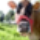

In [8]:
to_image = transforms.ToPILImage()
to_image(dataset[0][0])

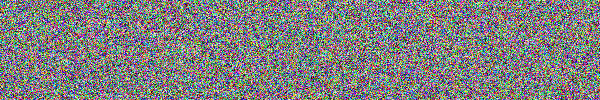

In [9]:
import torch

to_image(torch.randn(3, 100, 600))

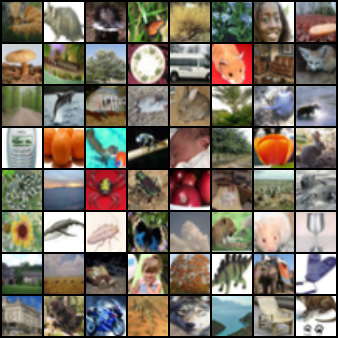

In [10]:
from torch.utils.data import DataLoader
from torchvision.utils import make_grid, save_image

dataloader = DataLoader(dataset, batch_size=64, shuffle=True)
dataiter = iter(dataloader)
img = make_grid(next(dataiter)[0], 8)  # 拼成8*8的图片网格，并且会转成3通道
to_image(img)

In [11]:
save_image(img, "cifar100_grid.png")

## 训练过程的可视化

In [12]:
import torchvision.utils as vutils
import numpy as np
from tensorboardX import SummaryWriter
import datetime

# SummaryWriter中提供了不同的写日志的方法，使用不同的方法写出的日志在TensorBoard中显示为不同的图形
writer = SummaryWriter()

# 有以下可用的写日志的方法
list(filter(lambda x: False if x.startswith("_") else True, dir(SummaryWriter)))

['add_audio',
 'add_custom_scalars',
 'add_custom_scalars_marginchart',
 'add_custom_scalars_multilinechart',
 'add_embedding',
 'add_figure',
 'add_graph',
 'add_graph_deprecated',
 'add_histogram',
 'add_histogram_raw',
 'add_hparams',
 'add_image',
 'add_image_with_boxes',
 'add_images',
 'add_mesh',
 'add_onnx_graph',
 'add_openvino_graph',
 'add_pr_curve',
 'add_pr_curve_raw',
 'add_scalar',
 'add_scalars',
 'add_text',
 'add_video',
 'close',
 'export_scalars_to_json',
 'flush']

### 添加标量

In [13]:
# 20个step对应的损失
losses = [1.3, 1.23, 1.19, 1.1, 1.098, 1.02, 0.98, 0.87, 0.67, 0.43, 0.23, 
          0.12, 0.12, 0.109, 0.09, 0.0009, 0.005, 0.0006, 0.00064, 0.00006]
for step in range(20):
    # 用add_scalar方法将信息写入日志文件
    writer.add_scalar("data/loss", losses[step], step)

### 图片的可视化

In [14]:
# 数据加载
from torchvision.datasets import ImageFolder
from torchvision import transforms, utils, models, datasets

simple_transform = transforms.Compose([transforms.Resize((120, 120)), transforms.ToTensor()])
train_data = ImageFolder('/home/coco/Documents/Learn_Pytorch_code/DogVsCatData/train', simple_transform)
for i in range(8):
    writer.add_image("data/Dog_Cat_Image_{}".format(i), train_data[i][0], i)
    writer.add_image_with_boxes("data/Dog_Cat_Image_with_box_{}".format(i), train_data[i][0], 
                                torch.Tensor([[10, 10, 100, 100]]), i)

### 音频输出

In [15]:
for i in range(3):
    writer.add_audio("audio/audio_{}".format(i), train_data[i][0].view(-1), i)

### 普通文本输出

In [16]:
for i in range(2):
    writer.add_text('Text/Simple_Text', 'text logged at step:{}'.format(i), i)
    writer.add_text('Text/Markdown_Text', '''a|b\n-|-\nc|d''', i)

### 标量导出为JSON文件

In [17]:
writer.export_scalars_to_json("./all_scalars.json")

### 降维投影

In [18]:
dataset = datasets.MNIST('./pytorch_dataset/', train=False, download=True)
images = dataset.data[:1000].float()
labels = dataset.targets[:1000]
features = images.view(1000, 784)
writer.add_embedding(features, metadata=labels, label_img=images.unsqueeze(1))
writer.add_embedding(features, global_step=1, tag='noMetadata')

### PR精度召回率曲线

In [19]:
writer.add_pr_curve('精度召回率曲线', np.random.randint(2, size=100), np.random.rand(100), 10)

In [20]:
true_positive_counts = [75, 64, 21, 5, 0]
false_positive_counts = [150, 105, 18, 0, 0]
true_negative_counts = [0, 45, 132, 150, 150]
false_negative_counts = [0, 11, 54, 70, 75]
precision = [0.3333333, 0.3786982, 0.5384616, 1.0, 0.0]
recall = [1.0, 0.8533334, 0.28, 0.0666667, 0.0]

writer.add_pr_curve_raw('精度召回率曲线原始数据', true_positive_counts,
                                false_positive_counts,
                                true_negative_counts,
                                false_negative_counts,
                                precision,
                                recall, 10)

In [21]:
%reload_ext tensorboard
%tensorboard --logdir=./runs --port=6006

## Visdom

In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
from torchvision import datasets, transforms
import argparse
import os
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [23]:
from torchvision.datasets import ImageFolder
 
# 数据加载
simple_transform = transforms.Compose([transforms.Resize((256,256))
                                       ,transforms.ToTensor()
                                       ,transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                      ])
train_data = ImageFolder('/home/coco/Documents/Learn_Pytorch_code/DogVsCatData/train', simple_transform)
print(train_data.class_to_idx)
print(train_data.classes) 

{'cat': 0, 'dog': 1}
['cat', 'dog']


In [24]:
import visdom

viz = visdom.Visdom(port=8097, server="127.0.0.1", env="Test")
loss_win = viz.line(np.arange(1))

Setting up a new session...


In [25]:
# 定义模型
class DogCat_Net(nn.Module):
    def __init__(self):
        super(DogCat_Net,self).__init__()
        # RGB对应Channel=3，定义16个卷积核，卷积核大小为7，膨胀率为2
        self.conv1 = nn.Conv2d(3, 4, kernel_size=7,dilation=2)
        self.conv2 = nn.Conv2d(4, 16, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(55696, 1000)
        self.fc2 = nn.Linear(1000,50)
        self.fc3 = nn.Linear(50, 2)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 55696)
        x = F.relu(self.fc1(x))
        x = F.dropout(x)
        x = F.relu(self.fc2(x))
        x = F.dropout(x)
        x = self.fc3(x)
        return F.log_softmax(x,dim=1)

In [26]:
def train(args, model, device, dataloader_kwargs):
    global_step = 0
    # 手动设置随机种子
    torch.manual_seed(args.get("seed"))
    # 加载训练数据
    train_loader = torch.utils.data.DataLoader(args.get("train_data"), batch_size=args.get("batch_size"), 
                                               num_workers=6, shuffle=True, **dataloader_kwargs)
    
    # 使用随机梯度下降进行优化
    optimizer = optim.SGD(model.parameters(), lr=args.get("lr"), momentum=args.get("momentum"))
    # 开始训练，训练epoches次
    for epoch in range(1, args.get("epochs") + 1):
        global_step = train_epoch(epoch, args, model, device, train_loader, optimizer, global_step)

In [27]:
def train_epoch(epoch, args, model, device, data_loader, optimizer, global_step):
    # 模型转换为训练模式
    model.train()
    pid = os.getpid()
    for batch_idx, (data, target) in enumerate(data_loader):
        # 优化器梯度置0
        optimizer.zero_grad()
        # 输入特征预测值
        output = model(data.to(device))
        # 预测值与标准值计算损失
        loss = F.nll_loss(output, target.to(device))
        # 计算梯度
        loss.backward()
        # 更新梯度
        optimizer.step()
        # 每log_interval步打印一下日志
        if batch_idx % args.get("log_interval") == 0:
            global_step += 1
            viz.line(Y=np.array([loss.item()]), X=np.array([global_step]), update='append', 
                     win=args.get("loss_win"))
            print('{}\tTrain Epoch: {} [{}/{} ({:.2f}%)]\tLoss: {:.12f}'.format(
                pid, epoch, batch_idx * len(data), len(data_loader.dataset), 
                100. * batch_idx / len(data_loader), loss.item()))
    return global_step

In [28]:
# 超参数及默认值
args={
    'batch_size':128,
    'epochs':5,
    'lr':0.01,
    'momentum':0.9,
    'seed':1,
    'log_interval':30,
    'train_data':train_data,
    'loss_win':loss_win
}

use_cuda=True if torch.cuda.is_available() else False

if __name__=="__main__":
    # 运行时设备
    device = torch.device("cuda" if use_cuda else "cpu")
    torch.cuda.empty_cache()
    # 使用固定缓冲区
    dataloader_kwargs = {'pin_memory': True} if use_cuda else {}
    # 模型拷贝到设备
    model = DogCat_Net().to(device)
    train(args, model, device, dataloader_kwargs)

3746	Train Epoch: 1 [0/25000 (0.00%)]	Loss: 0.694672822952
3746	Train Epoch: 1 [3840/25000 (15.31%)]	Loss: 0.688332676888
3746	Train Epoch: 1 [7680/25000 (30.61%)]	Loss: 0.686678588390
3746	Train Epoch: 1 [11520/25000 (45.92%)]	Loss: 0.675042808056
3746	Train Epoch: 1 [15360/25000 (61.22%)]	Loss: 0.691333830357
3746	Train Epoch: 1 [19200/25000 (76.53%)]	Loss: 0.674055218697
3746	Train Epoch: 1 [23040/25000 (91.84%)]	Loss: 0.683130204678
3746	Train Epoch: 2 [0/25000 (0.00%)]	Loss: 0.687580823898
3746	Train Epoch: 2 [3840/25000 (15.31%)]	Loss: 0.690231382847
3746	Train Epoch: 2 [7680/25000 (30.61%)]	Loss: 0.615187525749
3746	Train Epoch: 2 [11520/25000 (45.92%)]	Loss: 0.663485348225
3746	Train Epoch: 2 [15360/25000 (61.22%)]	Loss: 0.643124401569
3746	Train Epoch: 2 [19200/25000 (76.53%)]	Loss: 0.699363112450
3746	Train Epoch: 2 [23040/25000 (91.84%)]	Loss: 0.662293076515
3746	Train Epoch: 3 [0/25000 (0.00%)]	Loss: 0.614451467991
3746	Train Epoch: 3 [3840/25000 (15.31%)]	Loss: 0.591744124

In [29]:
def vgg_train(args, vgg, device, dataloader_kwargs):
    global_step = 0
    # 手动设置随机种子
    torch.manual_seed(args.get("seed")+1)
    # 加载训练数据
    train_loader = torch.utils.data.DataLoader(args.get("train_data"), batch_size=args.get("batch_size"), 
                                               num_workers=6, shuffle=True, **dataloader_kwargs)
    
    # 使用随机梯度下降进行优化
    optimizer = optim.SGD(vgg.parameters(), lr=args.get("lr"), momentum=args.get("momentum"))
    # 开始训练，训练epoches次
    for epoch in range(1, args.get("epochs") + 1):
        global_step = vgg_train_epoch(epoch, args, vgg, device, train_loader, optimizer, global_step)



def vgg_train_epoch(epoch, args, vgg, device, data_loader, optimizer, global_step):
    # 模型转换为训练模式
    vgg.train()
    pid = os.getpid()
    for batch_idx, (data, target) in enumerate(data_loader):
        # 优化器梯度置0
        optimizer.zero_grad()
        # 输入特征预测值
        output = F.log_softmax(vgg(data.to(device)), dim=1)
        # 预测值与标准值计算损失
        loss = F.nll_loss(output.narrow(1,0,2),target.to(device))
        # 计算梯度
        loss.backward()
        # 更新梯度
        optimizer.step()
        # 每10步打印一下日志
        if batch_idx % 10 == 0:
            global_step += 1
            viz.line(Y=np.array([loss.item()]), X=np.array([global_step]), update='append', 
                     win=args.get("loss_win"))
            print('{}\tTrain Epoch: {} [{}/{} ({:.2f}%)]\tLoss: {:.12f}'.format(
                pid, epoch, batch_idx * len(data), len(data_loader.dataset), 
                100. * batch_idx / len(data_loader), loss.item()))
    return global_step

In [30]:
from torchvision import models

vgg16_loss_win = viz.line(np.arange(1))

args_vgg16={
    'batch_size':32,
    'epochs':1,
    'lr':0.0001,
    'momentum':0.5,
    'seed':1,
    'log_interval':30,
    'train_data':train_data,
    'loss_win': vgg16_loss_win
}

if __name__=="__main__":
    #运行时设备
    device = torch.device("cuda:0" if use_cuda else "cpu")
    vgg16 = models.vgg16(pretrained=True)
    
    #冻结网络层
    for param in vgg16.features.parameters(): 
        param.requires_grad = False                                                              
    #微调网络
    fc_features = vgg16.classifier[6].in_features  
    #修改类别为2
    vgg16.classifier[6] = nn.Linear(fc_features,2) 
    vgg16.cuda()
    #使用固定缓冲区
    dataloader_kwargs = {'pin_memory': True} if use_cuda else {}
    vgg_train(args_vgg16, vgg16, device, dataloader_kwargs)

3746	Train Epoch: 1 [0/25000 (0.00%)]	Loss: 0.789377450943
3746	Train Epoch: 1 [320/25000 (1.28%)]	Loss: 0.707130908966
3746	Train Epoch: 1 [640/25000 (2.56%)]	Loss: 0.670900046825
3746	Train Epoch: 1 [960/25000 (3.84%)]	Loss: 0.480731457472
3746	Train Epoch: 1 [1280/25000 (5.12%)]	Loss: 0.419390469790
3746	Train Epoch: 1 [1600/25000 (6.39%)]	Loss: 0.400098770857
3746	Train Epoch: 1 [1920/25000 (7.67%)]	Loss: 0.426927089691
3746	Train Epoch: 1 [2240/25000 (8.95%)]	Loss: 0.383945345879
3746	Train Epoch: 1 [2560/25000 (10.23%)]	Loss: 0.379732310772
3746	Train Epoch: 1 [2880/25000 (11.51%)]	Loss: 0.299789935350
3746	Train Epoch: 1 [3200/25000 (12.79%)]	Loss: 0.267095625401
3746	Train Epoch: 1 [3520/25000 (14.07%)]	Loss: 0.321379423141
3746	Train Epoch: 1 [3840/25000 (15.35%)]	Loss: 0.312530815601
3746	Train Epoch: 1 [4160/25000 (16.62%)]	Loss: 0.265797853470
3746	Train Epoch: 1 [4480/25000 (17.90%)]	Loss: 0.265292376280
3746	Train Epoch: 1 [4800/25000 (19.18%)]	Loss: 0.195866808295
3746	T

## LeNet

In [31]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, kernel_size=(5, 5), stride=1)
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(20, 50, kernel_size=(5, 5), stride=1)
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(800, 500)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(500, 10)
        self.relu2 = nn.ReLU()
        
    def forward(self, x):
        x = self.pool1(self.conv1(x))
        x = self.pool2(self.conv2(x))
        x = self.relu1(self.fc1(x.view(-1, 800)))
        x = self.relu2(self.fc2(x))
        return F.log_softmax(x)

## AlexNet

In [32]:
a = torch.Tensor([[1.2, 2.3, 3.4], [6.7, 7.8, 1.09]])
b = nn.Dropout2d(0.5)
b(a)  # 经过Dropout后必须要除以保留概率，以使得该层在训练期间的输入总能量与在测试期间的输入总能量相同

tensor([[ 0.0000,  0.0000,  6.8000],
        [13.4000, 15.6000,  0.0000]])

In [33]:
alexnet = models.alexnet(pretrained=True).cuda()

In [34]:
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

## ZF-Net

In [35]:
class ZFNet(nn.Module):
    def __init__(self):
        super(ZFNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=1),
            nn.MaxPool2d((3, 3), stride=2, padding=1),
            nn.Conv2d(96, 256, kernel_size=(5, 5), stride=(2, 2)),
            nn.MaxPool2d((3, 3), stride=2, padding=1),
            nn.Conv2d(256, 384, kernel_size=3),
            nn.Conv2d(384, 384, kernel_size=3),
            nn.Conv2d(384, 256, kernel_size=3),
            nn.MaxPool2d((3, 3), stride=(2, 2))
        )
        self.classifier = nn.Sequential(
            nn.Linear(2304, 4096), 
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(4096, 1000)
        )
    
    def forward(self, x):
        x = self.features(x)
        x = x.view(-1, 4096)
        x = self.classifier(x)
        return x

## VGG-Nets

In [36]:
vgg16 = models.vgg16(pretrained=True).cuda()
vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

## GoogLeNet

In [37]:
class BasicConv2d(nn.Module):
    def __init__(self, in_channels, out_channels, **kwargs):
        super(BasicConv2d, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, bias=False, **kwargs)
        self.bn = nn.BatchNorm2d(out_channels, eps=0.001)
        
    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        return F.relu(x, inplace=True)
    
    
# GoogLeNet网络模型中的Inception(盗梦空间)结构
class Inception(nn.Module):
    def __init__(self, in_channels, pool_features):
        super(Inception, self).__init__()
        self.branch1X1 = BasicConv2d(in_channels, 64, kernel_size=1)
        
        self.branch5X5_1 = BasicConv2d(in_channels, 48, kernel_size=1)
        self.branch5X5_2 = BasicConv2d(48, 64, kernel_size=5, padding=2)
        
        self.branch3X3_1 = BasicConv2d(in_channels, 64, kernel_size=1)
        self.branch3X3_2 = BasicConv2d(64, 96, kernel_size=3, padding=1)
        
        self.branch_pool = BasicConv2d(in_channels, pool_features, kernel_size=1)
    
    def forward(self, x):
        branch1X1 = self.branch1X1(x)
        
        branch5X5 = self.branch5X5_1(x)
        branch5X5 = self.branch5X5_2(branch5X5)
        
        branch3X3 = self.branch3X3_1(x)
        branch3X3 = self.branch3X3_2(branch3X3)
        
        branch_pool = F.avg_pool2d(x, kernel_size=3, stride=1, padding=1)
        branch_pool = self.branch_pool(branch_pool)
        
        outputs = [branch1X1, branch3X3, branch5X5, branch_pool]
        return torch.cat(outputs, 1)

## ResNet

In [38]:
# 瓶颈残差模块
# 应该还有特征跳变残差模块，毕竟特征图的个数是会不断增加的，此时就不是简单的瓶颈残差模块了，具体实现请参考TensorFlow的教材
class Bottleneck(nn.Module):
    
    expansion = 4
    
    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(inplanes, planes, kernel_size=1, stride=stride, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        
        self.conv3 = nn.Conv2d(planes, planes * self.expansion, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(planes * self.expansion)
        
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride
        
    def forward(self, x):
        residual = x
        
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        
        out = self.conv2(x)
        out = self.bn2(out)
        out = self.relu(out)
        
        out = self.conv3(x)
        out = self.bn3(out)
        out = self.relu(out)
        
        if self.downsample is not None:
            residual = self.downsample(x)
            
        out += residual
        out = self.relu(out)
        return out

## DenseNet

In [39]:
# 书中介绍得太少了，了解一下吧，代码表达的是什么意思？
class _DenseLayer(nn.Sequential):
    def __init__(self, num_input_features, growth_rate, bn_size, drop_rate):
        super(_DenseLayer, self).__init__()
        self.add_module('norm1', nn.BatchNorm2d(num_input_features))
        self.add_module('relu1', nn.ReLU(inplace=True))
        self.add_module('conv1', nn.Conv2d(num_input_features, bn_size * growth_rate, 
                                           kernel_size=1, stride=1, bias=False))
        self.add_module('norm2', nn.BatchNorm2d(bn_size * growth_rate))
        self.add_module('relu2', nn.ReLU(inplace=True))
        self.add_module('conv2', nn.Conv2d(bn_size * growth_rate, growth_rate, kernel_size=3, 
                                          stride=1, padding=1, bias=False))
        self.drop_rate = drop_rate
        
    def forward(self, x):
        new_features = super(_DenseLayer, self).forward(x)
        if self.drop_rate > 0:
            new_features = F.dropout(new_features, p=self.drop_rate, training=self.training)
        return torch.cat([x, new_features], 1)
    
    
class _DenseBlock(nn.Sequential):
    def __init__(self, num_layers, num_input_features, bn_size, growth_rate, drop_rate):
        super(_DenseBlock, self).__init__()
        for i in range(num_layers):
            layer = _DenseLayer(num_input_features + i * growth_rate, growth_rate, bn_size, drop_rate)
            self.add_module('denselayer%d' % (i + 1), layer)

## 循环神经网络

In [40]:
class RNNCell(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, batch_size):
        super(RNNCell, self).__init__()
        self.batch_size = batch_size
        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)
        
    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden
    
    def initHidden(self):
        return torch.zeros(self.batch_size, self.hidden_size)

In [41]:
bins = 50 # 循环神经网络的跨度
input_dim = 1  # 循环神经网络的输入数据维度
lr = 0.01  # 初始学习率
epochs = 2000  # 轮次
hidden_size = 32  # 隐藏层神经元个数
num_layers = 2  # 网络层数
nonlinearity = "relu"  # 只支持ReLU和tanh


class RNNDemo(nn.Module):
    def __init__(self, input_dim, hidden_size, num_layers, nonlinearity):
        super().__init__()
        self.input_dim = input_dim
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.nonlinearity = nonlinearity
        self.rnn = nn.RNN(input_size=input_dim, hidden_size=hidden_size, 
                          num_layers=num_layers, nonlinearity=nonlinearity)
        self.out = nn.Linear(hidden_size, 1)
        
    def forward(self, x, h):
        r_out, h_state = self.rnn(x, h)  
        # r_out的形状为[bins, batch_size, hidden_size], h_state的形状为[num_layers, input_dim, hidden_size]
        outs = []
        for record in range(r_out.size(1)):
            outs.append(self.out(r_out[:, record, :]))
        return torch.stack(outs, dim=1), h_state

loss: 0.514145
loss: 0.489536
loss: 0.368197
loss: 0.178707
loss: 0.025019
loss: 0.006889
loss: 0.001543
loss: 0.000818
loss: 0.000621
loss: 0.000689
loss: 0.000366
loss: 0.000280
loss: 0.000243
loss: 0.000375
loss: 0.000727
loss: 0.413781
loss: 0.298874
loss: 0.013008
loss: 0.003242
loss: 0.001163


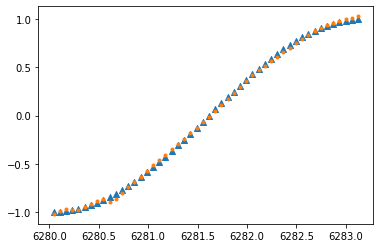

In [42]:
rnnDemo = RNNDemo(input_dim, hidden_size, num_layers, nonlinearity).cuda()
optimizer = torch.optim.Adam(rnnDemo.parameters(), lr=lr)
loss_func = nn.MSELoss()

h_state = None

for step in range(epochs):
    start, end = step * np.pi, (step + 1) * np.pi
    # 使用三角函数sin预测cos的值
    steps = np.linspace(start, end, bins, dtype=np.float32, endpoint=False)
    x_np = np.sin(steps)
    y_np = np.cos(steps)
    # [100, 1, 1]尺寸大小为[bins, batch_size, input_dim]
    x = torch.from_numpy(x_np).unsqueeze(1).unsqueeze(2).cuda()
    y = torch.from_numpy(y_np).unsqueeze(1).unsqueeze(2).cuda()
    prediction, h_state = rnnDemo(x, h_state)  # 循环神经网络输出（预测结果，隐藏状态）
    h_state = h_state.detach()
    loss = loss_func(prediction, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if step % 100 == 0:
        print("loss: {:.6f}".format(loss))

plt.scatter(steps, y_np, marker="^")
plt.scatter(steps, prediction.cpu().data.numpy().flatten(), marker=".")
plt.show()